In [1]:
import numpy as np
import pandas as pd
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import networkx as nw
%matplotlib inline

metadata_URL = "./the-movies-dataset/movies_metadata.csv"
genres_URL = "./the-movies-dataset/genres.csv"
scores_URL = "./ml-latest/95%_least_plausible.csv"
links_URL = "./the-movies-dataset/links.csv"
links_small_URL = "./the-movies-dataset/links_small.csv"
credits_URL = "./the-movies-dataset/credits.csv"
directors_URL = "./the-movies-dataset/directors.csv"
actors_URL = "./the-movies-dataset/actors.csv"
jobs_URL = "./the-movies-dataset/jobs.csv"

# データフレーム中のstringをdict型のリストに変換する
def make_list_from_str(string):
    if isinstance(string, str):
        result_list = eval(string)
    else:
        result_list = np.nan
    return result_list

def extract_ids(genres_list):
    id_list = []
    for genre in genres_list:
        id_list.append(genre["id"])
    return id_list

def extract_names(genres_list):
    id_list = []
    for genre in genres_list:
        id_list.append(genre["name"])
    return id_list

In [2]:
actors_df = pd.read_csv(actors_URL)
actors_df

,Unnamed: 0,id,name,appearance
0,0,31,Tom Hanks,72
1,1,12898,Tim Allen,29
2,2,7167,Don Rickles,29
3,3,12899,Jim Varney,20
4,4,12900,Wallace Shawn,75
5,5,7907,John Ratzenberger,46
6,6,8873,Annie Potts,15
7,7,1116442,John Morris,3
8,8,12901,Erik von Detten,11
9,9,12133,Laurie Metcalf,25


In [3]:
credits_df = pd.read_csv(credits_URL)
credits_df

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
5,"[{'cast_id': 25, 'character': 'Lt. Vincent Han...","[{'credit_id': '52fe4292c3a36847f802916d', 'de...",949
6,"[{'cast_id': 1, 'character': 'Linus Larrabee',...","[{'credit_id': '52fe44959251416c75039da9', 'de...",11860
7,"[{'cast_id': 2, 'character': 'Tom Sawyer', 'cr...","[{'credit_id': '52fe46bdc3a36847f810f797', 'de...",45325
8,"[{'cast_id': 1, 'character': 'Darren Francis T...","[{'credit_id': '52fe44dbc3a36847f80ae0f1', 'de...",9091
9,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '52fe426ec3a36847f801e14b', 'de...",710


In [4]:
print(type(credits_df.cast[0]), "　　　　castについて、str型をlist型に・・・")
credits_df.cast = credits_df.cast.map(make_list_from_str)
print(type(credits_df.cast[0]), "　　　　cast完了\n")

print(type(credits_df.crew[0]), "　　　　crewについて、str型をlist型に・・・")
credits_df.crew = credits_df.crew.map(make_list_from_str)
print(type(credits_df.crew[0]), "　　　　crew完了\n")

credits_df = credits_df.dropna()
credits_df.info()

<class 'str'> 　　　　castについて、str型をlist型に・・・
<class 'list'> 　　　　cast完了

<class 'str'> 　　　　crewについて、str型をlist型に・・・
<class 'list'> 　　　　crew完了

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45476 entries, 0 to 45475
Data columns (total 3 columns):
cast    45476 non-null object
crew    45476 non-null object
id      45476 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [8]:
#cast列をリストに

movies_cast_list = credits_df["cast"].tolist()

#castのidとnameを取り出し、重複するものはcountしておく

castid_list = []
castname_list = []
castcount_dict = {}

movie_count = 0

for movie_cast in movies_cast_list:
    for cast in movie_cast:
        if cast["id"] not in castid_list:
            castid_list.append(cast["id"])
            castname_list.append(cast["name"])
            castcount_dict[cast["id"]] = 1
        else:
            castcount_dict[cast["id"]] += 1
    
    movie_count += 1
    if movie_count % 2000 == 0:
        print(movie_count, "movies out of ", len(movies_cast_list), " finished.")

print("finished.")
        
castcount_list = list(castcount_dict.values())

2000 movies out of  45476  finished.
4000 movies out of  45476  finished.
6000 movies out of  45476  finished.
8000 movies out of  45476  finished.
10000 movies out of  45476  finished.
12000 movies out of  45476  finished.
14000 movies out of  45476  finished.
16000 movies out of  45476  finished.
18000 movies out of  45476  finished.
20000 movies out of  45476  finished.
22000 movies out of  45476  finished.
24000 movies out of  45476  finished.
26000 movies out of  45476  finished.
28000 movies out of  45476  finished.
30000 movies out of  45476  finished.
32000 movies out of  45476  finished.
34000 movies out of  45476  finished.
36000 movies out of  45476  finished.
38000 movies out of  45476  finished.
40000 movies out of  45476  finished.
42000 movies out of  45476  finished.
44000 movies out of  45476  finished.
finished.


In [27]:
credits_df

,cast,crew,id
0,"[{'gender': 2, 'order': 0, 'id': 31, 'profile_...","[{'gender': 2, 'profile_path': '/7EdqiNbr4FRjI...",862
1,"[{'gender': 2, 'order': 0, 'id': 2157, 'profil...","[{'gender': 2, 'profile_path': None, 'departme...",8844
2,"[{'gender': 2, 'order': 0, 'id': 6837, 'profil...","[{'gender': 2, 'profile_path': '/68Vae1HkU1NxQ...",15602
3,"[{'gender': 1, 'order': 0, 'id': 8851, 'profil...","[{'gender': 2, 'profile_path': '/4pMQkelS5lK66...",31357
4,"[{'gender': 2, 'order': 0, 'id': 67773, 'profi...","[{'gender': 2, 'profile_path': '/chEsfnDEtRmv1...",11862
5,"[{'gender': 2, 'order': 0, 'id': 1158, 'profil...","[{'gender': 2, 'profile_path': '/nKmUpRpuQIsYu...",949
6,"[{'gender': 2, 'order': 0, 'id': 3, 'profile_p...","[{'gender': 2, 'profile_path': '/zxkoU2diKtvar...",11860
7,"[{'gender': 2, 'order': 0, 'id': 53283, 'profi...","[{'gender': 2, 'profile_path': None, 'departme...",45325
8,"[{'gender': 2, 'order': 0, 'id': 15111, 'profi...","[{'gender': 2, 'profile_path': '/dAuDsStGGlUES...",9091
9,"[{'gender': 2, 'order': 0, 'id': 517, 'profile...","[{'gender': 2, 'profile_path': '/qhx0AySf8yH3k...",710


In [84]:
cast_list = []
for i in range(len(list(credits_df.id))):
    casts = []
    movie = credits_df.id[i]
    cast_len = len(credits_df[credits_df.id==movie].cast[i])
    for j in range(cast_len):
        casts.append(credits_df[credits_df.id==movie].cast[i][j]['id'])
    
    cast_list.append(casts)

print(cast_list)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [103]:
import collections
import itertools

cast_count = collections.Counter(itertools.chain.from_iterable(cast_list)).most_common(500)

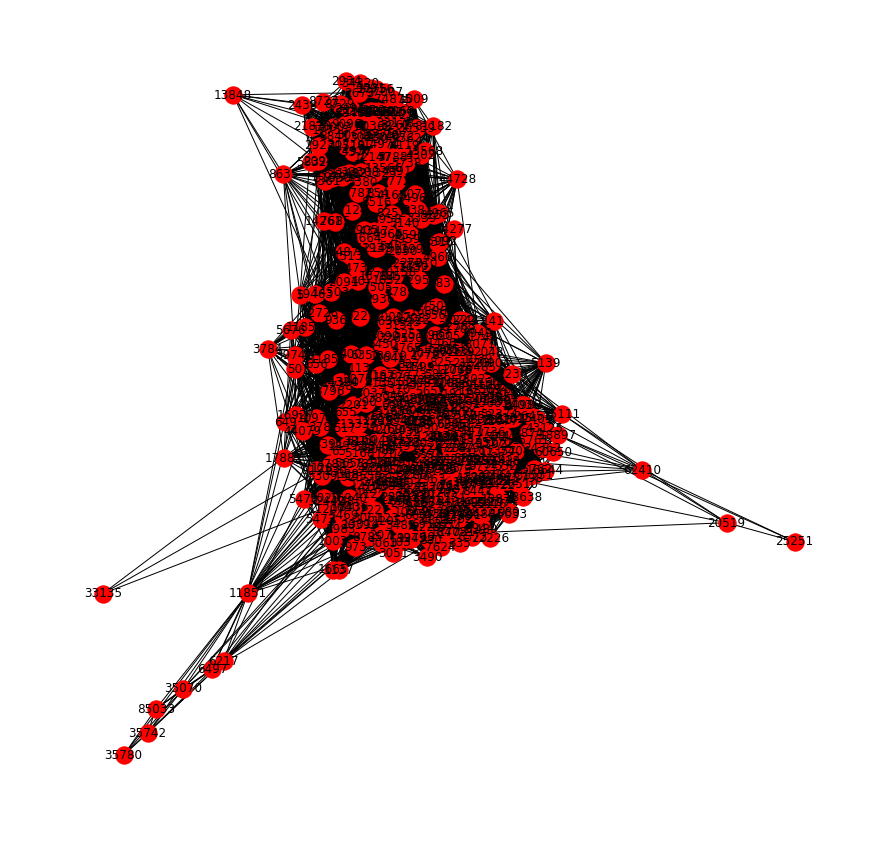

In [104]:
import networkx as nx

G = nx.Graph()

G.add_nodes_from([(cast, {"count":count}) for cast,count in cast_count])

for cast in cast_list:
    for node0,node1 in itertools.combinations(cast, 2):
        if not G.has_node(node0) or not G.has_node(node1):
            continue
        if G.has_edge(node0, node1):
            G.edge[node0][node1]["weight"] += 1
        else:
            G.add_edge(node0, node1, {"weight":1})
            
plt.figure(figsize=(15,15))
pos = nx.spring_layout(G)
nx.draw_networkx(G,pos)

plt.axis("off")
plt.show()

In [102]:
nx.write_gml(G, "movie_cast.gml")

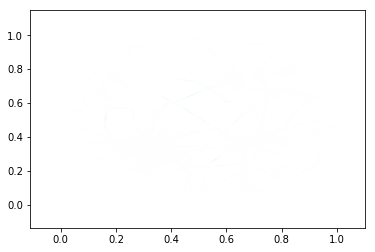

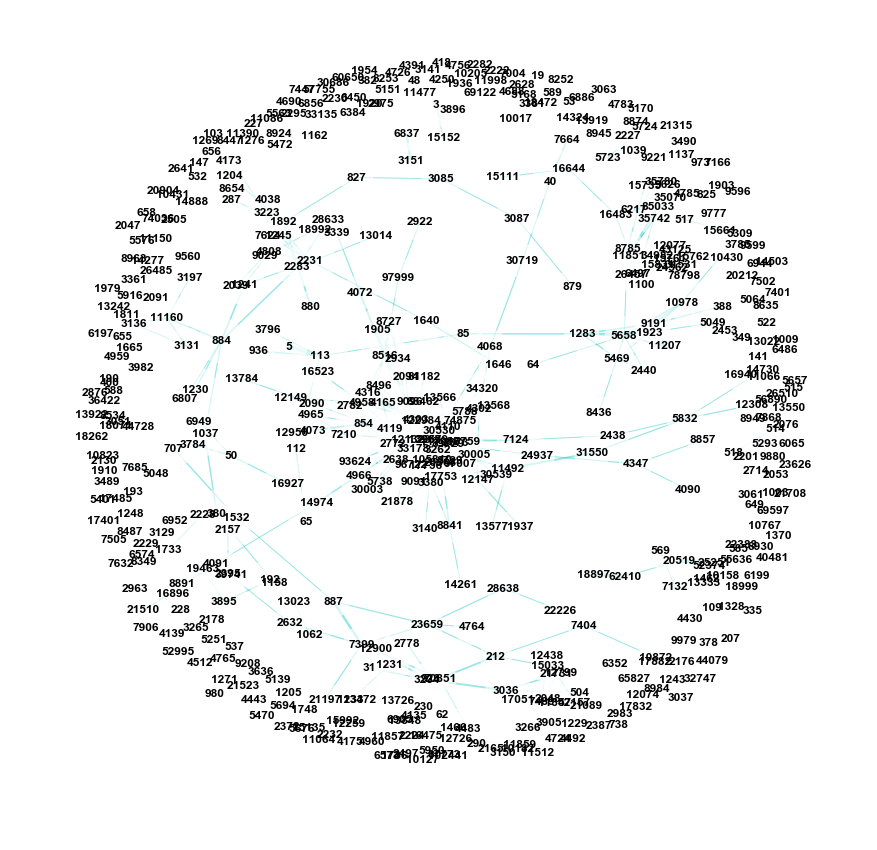

In [106]:
#for (u,v,d) in G.edges(data=True):
    #if d["weight"] <= 1:
        #G.remove_edge(u, v)
        
pos = nx.spring_layout(G, k=0.3)

node_size = [ d["count"]*20 for (n,d) in G.nodes(data=True)]
nx.draw_networkx_nodes(G, pos, node_color="w",alpha=0.6, node_size=node_size)

edge_width = [ d["weight"]*0.2 for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, alpha=0.4, edge_color="c", width=edge_width)

import math

for (u,v,d) in G.edges(data=True):
    if d["weight"] <= 1:
        G.remove_edge(u, v)

plt.figure(figsize=(15,15))
pos = nx.spring_layout(G, k=0.3)

node_size = [ d['count']*20 for (n,d) in G.nodes(data=True)]
nx.draw_networkx_nodes(G, pos, node_color='w',alpha=0.6, node_size=node_size)
nx.draw_networkx_labels(G, pos, fontsize=14, font_family="Arial", font_weight="bold")

edge_width = [ d['weight']*0.2 for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, alpha=0.4, edge_color='C', width=edge_width)

plt.axis('off')
plt.show()